## Library Imports

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import time


## Data Imports

In [2]:
cars = pd.read_csv('../data/capstone_data.csv')
cars.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Engine_power,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,...,400.0,315,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0


## Column Names Fix

In [3]:
cars.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Engine_power', 'Annual_Tax',
       'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed',
       'Seat_num', 'Door_num'],
      dtype='object')

In [4]:
cars.columns = cars.columns.str.lower().str.strip()

In [5]:
new_names = {
    'bodytype': 'body_type',
    'runned_miles': 'run_miles',
    'engin_size': 'engine_size'
}

cars = cars.rename(columns=new_names)
cars.columns

Index(['maker', 'genmodel', 'genmodel_id', 'adv_id', 'adv_year', 'adv_month',
       'color', 'reg_year', 'body_type', 'run_miles', 'engine_size', 'gearbox',
       'fuel_type', 'price', 'engine_power', 'annual_tax', 'wheelbase',
       'height', 'width', 'length', 'average_mpg', 'top_speed', 'seat_num',
       'door_num'],
      dtype='object')

## Column Overview

In [6]:
metadata = pd.DataFrame({
    'col_name': cars.columns,
    'type': cars.dtypes,
    'range': [f'{cars[col].min()} - {cars[col].max()}' if pd.api.types.is_numeric_dtype(cars[col]) else 'N/A' for col in cars.columns],
    'missing count': cars.isna().sum(),
    'missing %': round(cars.isna().mean() * 100),
    'unique values': cars.nunique()
})

metadata

,col_name,type,range,missing count,missing %,unique values
maker,maker,object,N/A,0,0.0,88
genmodel,genmodel,object,N/A,0,0.0,896
genmodel_id,genmodel_id,object,N/A,0,0.0,881
adv_id,adv_id,object,N/A,0,0.0,268255
adv_year,adv_year,int64,2012 - 2021,0,0.0,10
adv_month,adv_month,int64,1 - 33,0,0.0,15
color,color,object,N/A,21875,8.0,22
reg_year,reg_year,float64,1900.0 - 2019.0,7,0.0,26
body_type,body_type,object,N/A,954,0.0,18
run_miles,run_miles,object,N/A,1055,0.0,72420


## Data types and improper values

### adv_id

- set as index

In [7]:
cars = cars.set_index('adv_id')
cars.head()

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
10_1$$1,Bentley,Arnage,10_1,2018,4,Silver,2000.0,Saloon,60000,6.8L,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$2,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000,6.8L,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
10_1$$3,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000,6.8L,...,400.0,315,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0
10_1$$4,Bentley,Arnage,10_1,2018,4,Green,2003.0,Saloon,14000,6.8L,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$5,Bentley,Arnage,10_1,2017,11,Grey,2003.0,Saloon,61652,6.8L,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0


### maker

- change type to category

In [8]:
cars['maker'].unique()

array(['Bentley', 'Brooke', 'Bugatti', 'Cadillac', 'Caterham',
       'Chevrolet', 'Chrysler', 'Citroen', 'Corvette', 'DAX', 'DS',
       'Dacia', 'Daewoo', 'Daihatsu', 'Daimler', 'Dodge', 'Ferrari',
       'Fiat', 'Ford', 'Abarth', 'GMC', 'Ginetta', 'Great Wall',
       'Grinnall', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu',
       'Jaguar', 'Jeep', 'Jensen', 'KTM', 'Kia', 'Koenigsegg',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Alfa Romeo',
       'London Taxis International', 'Lotus', 'MEV', 'MG', 'MINI',
       'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Mitsubishi', 'Morgan', 'Nissan', 'Noble', 'Opel', 'Pagani',
       'Perodua', 'Peugeot', 'Aston Martin', 'Pilgrim', 'Porsche',
       'Proton', 'Radical', 'Raw', 'Renault', 'Reva', 'Rolls-Royce',
       'Rover', 'SEAT', 'Audi', 'SKODA', 'Saab', 'Santana', 'Sebring',
       'Smart', 'Ssangyong', 'Subaru', 'Suzuki', 'TVR', 'BMW', 'Tesla',
       'Tiger', 'Toyota', 'Vauxhall', 'Volkswagen',

In [9]:
cars['maker'] = cars['maker'].astype('category')

### genmodel & genmodel_id

- drop genmodel_id

In [10]:
genmodel_counter = cars.groupby('genmodel_id')['genmodel'].agg([pd.Series.nunique, pd.Series.unique])

genmodel_counter[genmodel_counter['nunique'] > 1].sort_values(by='nunique', ascending=False)

,nunique,unique
genmodel_id,,
48_24,7,"[RX 200t, RX 350, RX 400h, Rx Unspecified, RX ..."
48_8,7,"[IS 250, IS F, IS 220d, IS 200, IS Unspecified..."
48_2,6,"[GS 250, GS 430, GS 300, GS Unspecified, GS F,..."
7_11,5,"[A6 Unspecified, A6 Allroad, A6 Avant, A6 Salo..."
48_18,4,"[NX Unspecified, NX 200t, NX 300h, NX]"
48_21,4,"[RC F, RC 300h, RC 200t, RC]"
21_1,3,"[DS3, 3, DS3 Cabrio]"
48_15,3,"[LS 460, LS 430, LS 600h]"
21_3,2,"[DS4, 4]"


In [11]:
genmodel_counter = cars.groupby('genmodel')['genmodel_id'].agg([pd.Series.nunique, pd.Series.unique])

genmodel_counter[genmodel_counter['nunique'] > 1].sort_values(by='nunique', ascending=False)

,nunique,unique
genmodel,,
GT,3,"[29_22, 41_1, 4_12]"
Roadster,3,"[54_8, 63_5, 84_3]"
Coupe,3,"[36_3, 54_5, 55_4]"
Insignia,2,"[66_2, 94_13]"
Tacuma,2,"[16_16, 23_5]"
Spider,2,"[28_25, 4_15]"
Matiz,2,"[16_12, 23_3]"
Lacetti,2,"[16_11, 23_2]"
Kalos,2,"[16_10, 23_1]"


In [12]:
cars[cars['genmodel'] == '308']

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
27_1$$1,Ferrari,308,27_1,2017,10,Red,2001.0,Coupe,46466,2.9L,...,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
27_1$$2,Ferrari,308,27_1,2018,4,Red,2014.0,Saloon,30000,2.9L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27_1$$3,Ferrari,308,27_1,2018,5,Red,1980.0,Convertible,30000,2.9L,...,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
69_18$$1,Peugeot,308,69_18,2018,5,Grey,2014.0,Hatchback,7000,1.6L,...,92.0,0,2620.0,1457.0,2043.0,4253.0,78.5 mpg,113 mph,5.0,5.0
69_18$$2,Peugeot,308,69_18,2018,1,Grey,2014.0,Hatchback,23039,1.6L,...,156.0,140,2620.0,1457.0,2043.0,4253.0,48.7 mpg,132 mph,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69_18$$794,Peugeot,308,69_18,2021,6,Grey,2019.0,Hatchback,4180,1.2L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
69_18$$795,Peugeot,308,69_18,2021,6,Red,2019.0,Hatchback,6684,1.5L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
69_18$$796,Peugeot,308,69_18,2021,6,Red,2019.0,Hatchback,3812,1.2L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0


In [13]:
genmodel_counter = cars.groupby(['maker', 'genmodel'])['genmodel_id'].agg([pd.Series.nunique, pd.Series.unique])

genmodel_counter[genmodel_counter['nunique'] > 1].sort_values(by='nunique', ascending=False)

/var/folders/21/rcmh3v5n76q6p054f301fjpr0000gn/T/ipykernel_52798/1602035780.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genmodel_counter = cars.groupby(['maker', 'genmodel'])['genmodel_id'].agg([pd.Series.nunique, pd.Series.unique])


,,nunique,unique
maker,genmodel,,


In [14]:
cars.drop(columns=['genmodel_id'])

,maker,genmodel,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,gearbox,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
10_1$$1,Bentley,Arnage,2018,4,Silver,2000.0,Saloon,60000,6.8L,Automatic,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$2,Bentley,Arnage,2018,6,Grey,2002.0,Saloon,44000,6.8L,Automatic,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
10_1$$3,Bentley,Arnage,2017,11,Blue,2002.0,Saloon,55000,6.8L,Automatic,...,400.0,315,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0
10_1$$4,Bentley,Arnage,2018,4,Green,2003.0,Saloon,14000,6.8L,Automatic,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$5,Bentley,Arnage,2017,11,Grey,2003.0,Saloon,61652,6.8L,Automatic,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97_1$$1,Westfield,Sport,2018,5,Yellow,2006.0,Convertible,1800,2.2L,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
97_1$$2,Westfield,Sport,2018,5,Yellow,2006.0,Convertible,2009,NaN,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99_1$$1,Zenos,E10,2018,3,Red,2016.0,Convertible,6,2.0L,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


### adv_year

### adv_month

- drop rows with month > 12

In [15]:
month_criteria = cars['adv_month'] <= 12

cars[~month_criteria]

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
29_32$$75,Ford,Streetka,29_32,2012,13,Blue,2005.0,Convertible,22000,1.6L,...,94.0,NaN,2450.0,1332.0,1852.0,3650.0,35.8 mpg,108 mph,2.0,2.0
69_23$$2,Peugeot,407,69_23,2012,17,Blue,2006.0,Coupe,77000,2.7L,...,205.0,NaN,2725.0,1399.0,1868.0,4815.0,33.2 mpg,143 mph,4.0,2.0
77_4$$10,Rolls-Royce,Phantom,77_4,2012,33,Black,2007.0,Saloon,20000,6.7L,...,NaN,555,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [16]:
cars = cars[month_criteria]

cars[~month_criteria]

/var/folders/21/rcmh3v5n76q6p054f301fjpr0000gn/T/ipykernel_52798/2064158349.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cars[~month_criteria]


,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,


### color

- change type to category

In [17]:
cars['color'] = cars['color'].astype('category')

### reg_year

- drop rows with missing reg_year

In [18]:
cars[cars['reg_year'].isna()]

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
8_11$$225,BMW,6 Series,8_11,2018,3,Black,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_11$$227,BMW,6 Series,8_11,2018,1,Silver,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_12$$103,BMW,6 Series Gran Coupe,8_12,2018,2,Black,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_14$$369,BMW,7 Series,8_14,2018,4,Grey,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_14$$405,BMW,7 Series,8_14,2018,2,Black,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_14$$794,BMW,7 Series,8_14,2018,4,Grey,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_29$$160,BMW,M2,8_29,2018,4,Black,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cars = cars.dropna(subset=['reg_year'])

cars[cars['reg_year'].isna()]

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,


### body_type

- swap body_type and gearbox for 'Manual' body_type
- change type to category

In [20]:
cars['body_type'].value_counts(dropna=False)

body_type
Hatchback          103768
SUV                 64396
Saloon              22582
MPV                 22507
Coupe               17081
Estate              16797
Convertible         13205
Pickup               5268
NaN                   947
Combi Van             657
Panel Van             477
Minibus               229
Car Derived Van       119
Limousine              93
Window Van             88
Camper                 24
Manual                  5
Tipper                  1
Chassis Cab             1
Name: count, dtype: int64

In [21]:
cars[cars['body_type'] == 'Manual'][['body_type','gearbox']]

,body_type,gearbox
adv_id,,
28_27$$2,Manual,NaN
94_10$$203,Manual,NaN
94_24$$88,Manual,NaN
94_24$$118,Manual,NaN
94_24$$182,Manual,NaN


In [22]:
wrong_body_type = cars['body_type'] == 'Manual'

cars.loc[wrong_body_type, ['body_type', 'gearbox']] = cars.loc[wrong_body_type, ['gearbox', 'body_type']].values

In [23]:
cars['body_type'] = cars['body_type'].astype('category')

### run_miles

- replace '1 mile' with 1
- changed type to float

In [24]:
numeric_run_miles = pd.to_numeric(cars['run_miles'], errors='coerce')

cars.loc[numeric_run_miles.isna(), 'run_miles'].value_counts(dropna=False)

run_miles
NaN       1048
1 mile     258
Name: count, dtype: int64

In [25]:
cars[cars['run_miles'].isna()]

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
10_3$$52,Bentley,Bentayga,10_3,2018,5,Grey,2018.0,SUV,NaN,6.0L,...,NaN,NaN,2995.0,1742.0,2224.0,5140.0,NaN,NaN,5.0,5.0
10_3$$77,Bentley,Bentayga,10_3,2018,3,NaN,2018.0,SUV,NaN,6.0L,...,NaN,NaN,2995.0,1742.0,2224.0,5140.0,NaN,NaN,5.0,5.0
18_10$$114,Citroen,C3 Picasso,18_10,2018,5,Green,2011.0,MPV,NaN,1.6L,...,90.0,30,2540.0,1670.0,1766.0,4078.0,62.2 mpg,108 mph,5.0,5.0
18_12$$175,Citroen,C4,18_12,2014,3,White,2013.0,Hatchback,NaN,1.6L,...,115.0,120,2608.0,1491.0,1789.0,4329.0,NaN,NaN,5.0,5.0
18_12$$386,Citroen,C4,18_12,2018,1,Silver,2013.0,Hatchback,NaN,1.6L,...,90.0,20,2608.0,1491.0,1789.0,4329.0,70.6 mpg,112 mph,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96_7$$453,Volvo,V40,96_7,2018,4,White,2014.0,Hatchback,NaN,1.6L,...,115.0,0,2647.0,1445.0,2041.0,4369.0,83.1 mpg,118 mph,5.0,5.0
96_7$$480,Volvo,V40,96_7,2018,5,Blue,2014.0,Hatchback,NaN,1.6L,...,115.0,0,2646.0,1458.0,2041.0,4370.0,83.1 mpg,118 mph,5.0,5.0
96_7$$489,Volvo,V40,96_7,2018,3,White,2014.0,Hatchback,NaN,2.0L,...,150.0,30,2647.0,1445.0,2041.0,4369.0,65.7 mpg,130 mph,5.0,5.0


In [26]:
cars = cars.dropna(subset=['run_miles'])

cars['run_miles'] = cars['run_miles'].replace('1 mile', 1).astype('float')

### engine_size

- remove unit 
- change type to float

In [27]:
numeric_engine_size = pd.to_numeric(cars['engine_size'], errors='coerce')

cars.loc[numeric_engine_size.isna(), 'engine_size'].unique()

array(['6.8L', '6.7L', '4.4L', '6.0L', '4.0L', nan, '1.5L', '3.0L',
       '6.75L', '2.3L', '8.0L', '1.9L', '2.8L', '6.2L', '3.6L', '1.8L',
       '1.6L', '1.4L', '1.2L', '1.0L', '0.8L', '2.0L', '5.3L', '1.7L',
       '4.3L', '3.8L', '2.2L', '2.4L', '7.0L', '5.7L', '0.9L', '1.3L',
       '3.5L', '6.1L', '3.2L', '3.3L', '2.5L', '2.7L', '1.1L', '0.66L',
       '6.4L', '3.7L', '5.9L', '2.9L', '5.5L', '6.5L', '3.9L', '4.2L',
       '6.3L', '4.5L', '5.8L', '4.6L', '1.25L', '5.4L', '5.0L', '5.2L',
       '4.7L', '2.1L', '3.1L', '0.1L', '4.8L', '6.9L', '2.6L', '4.9L',
       '0.3L', '2998.0L', '6.6L', '1400.0L', '3500.0L', '3.4L', '8.2L',
       '0.6L', '0.7L', '10.0L', '1.33L'], dtype=object)

In [28]:
cars['engine_size'] = cars['engine_size'].str.replace('L', '').astype('float')

### gearbox

- change type to category

In [29]:
cars['gearbox'].value_counts(dropna=False)

gearbox
Manual            170123
Automatic          96792
NaN                  145
Semi-Automatic       137
Name: count, dtype: int64

In [30]:
cars['gearbox'] = cars['gearbox'].astype('category')

### fuel_type

- make values uniform
- change type to category

In [31]:
cars['fuel_type'].value_counts(dropna=False)

fuel_type
Diesel                             132210
Petrol                             126932
Hybrid  Petrol/Electric              4487
Electric                             1295
Hybrid  Petrol/Electric Plug-in      1003
NaN                                   397
Petrol Hybrid                         385
Petrol Plug-in Hybrid                 258
Hybrid  Diesel/Electric               108
Diesel Hybrid                          47
Hybrid  Diesel/Electric Plug-in        37
Bi Fuel                                28
Petrol Ethanol                          8
Diesel Plug-in Hybrid                   2
Name: count, dtype: int64

In [32]:
fuel_new_names = {
    'Hybrid  Petrol/Electric': 'Petrol Hybrid',
    'Hybrid  Petrol/Electric Plug-in': 'Petrol Hybrid Plug-in',
    'Hybrid  Diesel/Electric': 'Diesel Hybrid',
    'Hybrid  Diesel/Electric Plug-in': 'Diesel Hybrid Plug-in',
    'Petrol Plug-in Hybrid': 'Petrol Hybrid Plug-in',
    'Diesel Plug-in Hybrid': 'Diesel Hybrid Plug-in',
    'Petrol Ethanol': 'Petrol',
    'Bi Fuel': 'Bi-Fuel'
}

cars['fuel_type'] = cars['fuel_type'].replace(fuel_new_names).astype('category')

In [33]:
cars['fuel_type'].value_counts(dropna=False)

fuel_type
Diesel                   132210
Petrol                   126940
Petrol Hybrid              4872
Electric                   1295
Petrol Hybrid Plug-in      1261
NaN                         397
Diesel Hybrid               155
Diesel Hybrid Plug-in        39
Bi-Fuel                      28
Name: count, dtype: int64

### price

- drop rows with missing price

In [34]:
cars[cars['price'].isna()]

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
8_11$$1,BMW,6 Series,8_11,2018,2,Black,2009.0,Convertible,39000.0,4.8,...,NaN,NaN,2780.0,1373.0,1855.0,4820.0,NaN,NaN,4.0,2.0
8_11$$2,BMW,6 Series,8_11,2018,3,Grey,2005.0,Convertible,97981.0,4.4,...,NaN,NaN,2780.0,1373.0,1855.0,4820.0,NaN,NaN,5.0,2.0
8_11$$3,BMW,6 Series,8_11,2017,7,Black,2004.0,Convertible,84000.0,4.4,...,NaN,NaN,2780.0,1373.0,1855.0,4820.0,NaN,NaN,5.0,2.0
8_11$$4,BMW,6 Series,8_11,2018,3,Silver,2012.0,Convertible,25850.0,3.0,...,NaN,NaN,2855.0,1369.0,2090.0,4894.0,NaN,NaN,4.0,2.0
8_11$$5,BMW,6 Series,8_11,2017,9,Black,2005.0,Convertible,99000.0,4.4,...,NaN,NaN,2780.0,1373.0,1855.0,4820.0,NaN,NaN,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_29$$235,BMW,M2,8_29,2018,4,Blue,2016.0,Coupe,6998.0,3.0,...,NaN,NaN,2693.0,1410.0,1854.0,4468.0,NaN,NaN,4.0,2.0
8_29$$238,BMW,M2,8_29,2018,3,White,2017.0,Coupe,151.0,3.0,...,NaN,NaN,2693.0,1410.0,1854.0,4468.0,NaN,NaN,4.0,2.0
8_29$$239,BMW,M2,8_29,2018,3,White,2018.0,Coupe,101.0,3.0,...,NaN,NaN,2693.0,1410.0,1854.0,4468.0,NaN,NaN,4.0,2.0


In [35]:
cars = cars.dropna(subset=['price'])

cars[cars['price'].isna()]

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,


### engine_power

### annual_tax

- drop column

In [36]:
cars = cars.drop(columns=['annual_tax'])

In [37]:
# cars['annual_tax'].value_counts(dropna=False)

# numeric_annual_tax = pd.to_numeric(cars['annual_tax'], errors='coerce')

# cars.loc[numeric_annual_tax.isna(), 'annual_tax'].value_counts(dropna=False)

# cars['annual_tax'] = cars['annual_tax'].replace('*', np.NaN).str.strip().str.replace('*', '').astype('float')

### wheelbase

### height

### width

### length

### average_mpg

- remove unit
- change type to float

In [38]:
numeric_average_mpg = pd.to_numeric(cars['average_mpg'], errors='coerce')

cars.loc[numeric_average_mpg.isna(), 'average_mpg'].unique()

array([nan, '13.7 mpg', '14.7 mpg', '22.1 mpg', '24.8 mpg', '38.2 mpg',
       '21.6 mpg', '25.4 mpg', '19.0 mpg', '17.0 mpg', '16.5 mpg',
       '26.9 mpg', '26.4 mpg', '26.8 mpg', '25.9 mpg', '23.2 mpg',
       '16.9 mpg', '19.5 mpg', '17.1 mpg', '19.3 mpg', '18.0 mpg',
       '17.8 mpg', '26.6 mpg', '19.2 mpg', '44.1 mpg', '42.2 mpg',
       '39.8 mpg', '32.1 mpg', '36.2 mpg', '39.2 mpg', '39.7 mpg',
       '34.9 mpg', '50.4 mpg', '56.5 mpg', '49.6 mpg', '42.8 mpg',
       '54.3 mpg', '40.4 mpg', '35.3 mpg', '53.3 mpg', '38.7 mpg',
       '35.8 mpg', '40.3 mpg', '47.1 mpg', '28.5 mpg', '29.1 mpg',
       '55.4 mpg', '30.4 mpg', '32.8 mpg', '31.4 mpg', '62.8 mpg',
       '43.5 mpg', '57.6 mpg', '36.6 mpg', '31.7 mpg', '35.7 mpg',
       '67.3 mpg', '68.9 mpg', '74.3 mpg', '25.7 mpg', '22.2 mpg',
       '20.2 mpg', '25.2 mpg', '23.0 mpg', '28.0 mpg', '27.2 mpg',
       '21.2 mpg', '33.2 mpg', '36.7 mpg', '28.9 mpg', '33.6 mpg',
       '30.1 mpg', '40.9 mpg', '28.8 mpg', '45.6 mpg', '4

In [39]:
cars['average_mpg'] = cars['average_mpg'].str.replace('mpg', '').str.strip().astype('float')

### top_speed

- remove unit
- change type to float

In [40]:
numeric_top_speed= pd.to_numeric(cars['top_speed'], errors='coerce')

cars.loc[numeric_top_speed.isna(), 'top_speed'].unique()

array([nan, '179 mph', '155 mph', '187 mph', '180 mph', '167 mph',
       '191 mph', '204 mph', '202 mph', '198 mph', '188 mph', '192 mph',
       '190 mph', '203 mph', '195 mph', '207 mph', '200 mph', '197 mph',
       '194 mph', '206 mph', '209 mph', '205 mph', '199 mph', '183 mph',
       '98 mph', '109 mph', '116 mph', '121 mph', '97 mph', '90 mph',
       '84 mph', '94 mph', '114 mph', '111 mph', '122 mph', '102 mph',
       '96 mph', '104 mph', '108 mph', '112 mph', '113 mph', '107 mph',
       '99 mph', '124 mph', '118 mph', '115 mph', '127 mph', '101 mph',
       '136 mph', '143 mph', '144 mph', '168 mph', '130 mph', '126 mph',
       '133 mph', '120 mph', '132 mph', '117 mph', '106 mph', '103 mph',
       '119 mph', '129 mph', '128 mph', '141 mph', '131 mph', '105 mph',
       '125 mph', '151 mph', '134 mph', '140 mph', '139 mph', '135 mph',
       '100 mph', '93 mph', '88 mph', '87 mph', '80 mph', '110 mph',
       '145 mph', '146 mph', '123 mph', '137 mph', '89 mph', '91 mph

In [41]:
cars['top_speed'] = cars['top_speed'].str.replace('mph', '').str.strip().astype('float')

### seat_num

In [42]:
cars['seat_num'].value_counts(dropna=False)

seat_num
5.0     190722
4.0      40125
7.0      19012
2.0       8506
NaN       6300
8.0        579
6.0        454
9.0        236
3.0        125
17.0         2
1.0          1
Name: count, dtype: int64

### door_num

In [43]:
cars['door_num'].value_counts(dropna=False)

door_num
5.0    176773
3.0     32879
4.0     28784
2.0     23039
NaN      4420
6.0       165
7.0         1
0.0         1
Name: count, dtype: int64

## Column Overview 2

In [44]:
metadata2 = pd.DataFrame({
    'col_name': cars.columns,
    'type': cars.dtypes,
    'range': [f'{cars[col].min()} - {cars[col].max()}' if pd.api.types.is_numeric_dtype(cars[col]) else 'N/A' for col in cars.columns],
    'missing count': cars.isna().sum(),
    'missing %': round(cars.isna().mean() * 100),
    'unique values': cars.nunique()
})

metadata2

,col_name,type,range,missing count,missing %,unique values
maker,maker,category,N/A,0,0.0,87
genmodel,genmodel,object,N/A,0,0.0,887
genmodel_id,genmodel_id,object,N/A,0,0.0,872
adv_year,adv_year,int64,2013 - 2021,0,0.0,9
adv_month,adv_month,int64,1 - 12,0,0.0,12
color,color,category,N/A,21704,8.0,22
reg_year,reg_year,float64,1900.0 - 2019.0,0,0.0,26
body_type,body_type,category,N/A,924,0.0,17
run_miles,run_miles,float64,0.0 - 6363342.0,0,0.0,72306
engine_size,engine_size,float64,0.1 - 3500.0,1972,1.0,74


## Improper values 2

### reg_year & adv_year

In [45]:
cars[cars['reg_year'] > cars['adv_year']].head()

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
10_3$$20,Bentley,Bentayga,10_3,2017,10,Black,2018.0,SUV,40.0,6.0,...,239950.0,NaN,2995.0,1742.0,2224.0,5140.0,NaN,NaN,5.0,5.0
10_3$$21,Bentley,Bentayga,10_3,2017,12,Silver,2018.0,SUV,80.0,4.0,...,209950.0,NaN,2995.0,1742.0,2224.0,5140.0,NaN,NaN,5.0,5.0
10_3$$44,Bentley,Bentayga,10_3,2017,8,Black,2018.0,SUV,100.0,4.0,...,209950.0,NaN,2995.0,1742.0,2224.0,5140.0,NaN,NaN,5.0,5.0
10_3$$76,Bentley,Bentayga,10_3,2017,8,Black,2018.0,SUV,100.0,6.0,...,229950.0,NaN,2995.0,1742.0,2224.0,5140.0,NaN,NaN,5.0,5.0
10_3$$97,Bentley,Bentayga,10_3,2017,9,White,2018.0,SUV,100.0,6.0,...,229950.0,NaN,2995.0,1742.0,2224.0,5140.0,NaN,NaN,5.0,5.0


### run_miles

In [46]:
cars['run_miles'].sort_values(ascending=False).head()

adv_id
95_15$$993     6363342.0
36_6$$73       1080000.0
54_3$$164       967515.0
39_7$$823       900000.0
29_14$$1013     900000.0
Name: run_miles, dtype: float64

In [47]:
(cars['run_miles'] / (2023 - cars['reg_year']) + 1).sort_values(ascending=False).head()

adv_id
95_15$$993     397709.875000
39_7$$823       69231.769231
29_14$$1013     69231.769231
36_6$$73        60001.000000
21_1$$1000      59433.363636
dtype: float64

In [48]:
cars = cars.drop('95_15$$993')

### reg_year

In [49]:
cars.sort_values(by='reg_year').head()

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
94_9$$342,Vauxhall,Corsa,94_9,2018,5,Grey,1900.0,Hatchback,4386.0,1.4,...,8500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71_1$$1,Porsche,356,71_1,2017,12,Black,1960.0,Convertible,97546.0,1.6,...,225000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29_10$$1,Ford,F1,29_10,2017,9,Green,1960.0,Pickup,4000.0,6.0,...,39950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29_28$$177,Ford,Mustang,29_28,2018,1,Grey,1970.0,Convertible,36500.0,5.0,...,59995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75_12$$248,Renault,Megane,75_12,2018,5,Blue,1970.0,Hatchback,59000.0,NaN,...,3795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cars = cars.drop('94_9$$342')

### engine_size

In [51]:
cars.sort_values(by='engine_size', ascending=False).head()

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
64_8$$77,Nissan,Elgrand,64_8,2018,7,Black,2004.0,MPV,52000.0,3500.0,...,9988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
62_11$$3,Mitsubishi,Gto,62_11,2018,5,Red,2002.0,Coupe,61000.0,2998.0,...,2995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
64_6$$2,Nissan,Cubic,64_6,2018,5,NaN,2003.0,Estate,71000.0,1400.0,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
87_3$$349,Suzuki,Celerio,87_3,2018,3,White,2017.0,Hatchback,22058.0,10.0,...,5499.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71_8$$487,Porsche,Cayenne,71_8,2018,3,Black,2018.0,Estate,50.0,8.2,...,64990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
problematic_indexes = ['64_8$$77', '62_11$$3', '64_6$$2']
cars.loc[problematic_indexes, 'engine_size'] = (cars.loc[problematic_indexes, 'engine_size'] / 1000).round(1)
cars.loc[problematic_indexes]

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
64_8$$77,Nissan,Elgrand,64_8,2018,7,Black,2004.0,MPV,52000.0,3.5,...,9988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
62_11$$3,Mitsubishi,Gto,62_11,2018,5,Red,2002.0,Coupe,61000.0,3.0,...,2995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
64_6$$2,Nissan,Cubic,64_6,2018,5,NaN,2003.0,Estate,71000.0,1.4,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


### engine power

In [53]:
cars.sort_values(by='engine_power').head()

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
75_19$$1,Renault,Twizy,75_19,2018,5,Grey,2012.0,Coupe,9300.0,NaN,...,4500.0,17.0,1684.0,1461.0,1191.0,2337.0,NaN,50.0,2.0,2.0
8_27$$290,BMW,i3,8_27,2018,6,Blue,2017.0,Hatchback,2000.0,0.6,...,33950.0,38.0,2570.0,1598.0,2039.0,4011.0,NaN,93.0,4.0,5.0
78_6$$2,Rover,Mini,78_6,2018,5,White,1990.0,Saloon,30000.0,1.0,...,5000.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
78_6$$3,Rover,Mini,78_6,2017,12,Blue,1990.0,Saloon,8900.0,1.0,...,7995.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
78_6$$7,Rover,Mini,78_6,2018,5,Blue,1990.0,Saloon,64000.0,1.0,...,4500.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [54]:
cars = cars.drop('8_27$$290')

### wheelbase

In [55]:
cars['wheelbase'].value_counts().sort_index().head()

wheelbase
0.0       7368
1420.0      28
1445.0       1
1505.0       5
1541.0       1
Name: count, dtype: int64

In [56]:
cars['wheelbase'] = cars['wheelbase'].replace(0, np.NaN)

In [57]:
cars['wheelbase'].value_counts().sort_index().head()

wheelbase
1420.0    28
1445.0     1
1505.0     5
1541.0     1
1547.0     3
Name: count, dtype: int64

### height

In [58]:
cars['height'].value_counts().sort_index().head()

height
0.0      924
200.0     81
669.0      2
797.0      4
803.0     10
Name: count, dtype: int64

In [59]:
cars['height'] = cars['height'].replace(0, np.NaN)

In [60]:
cars.sort_values(by='height').head()

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
62_13$$738,Mitsubishi,L200,62_13,2018,3,Silver,2011.0,Pickup,56160.0,2.5,...,13000.0,175.0,NaN,200.0,1815.0,5185.0,NaN,NaN,NaN,4.0
62_13$$317,Mitsubishi,L200,62_13,2018,5,White,2011.0,Pickup,48200.0,2.5,...,11499.0,175.0,NaN,200.0,1815.0,5185.0,NaN,NaN,NaN,4.0
62_13$$323,Mitsubishi,L200,62_13,2018,7,Blue,2011.0,Pickup,61300.0,2.5,...,12745.0,175.0,NaN,200.0,1815.0,5185.0,NaN,NaN,NaN,4.0
62_13$$342,Mitsubishi,L200,62_13,2018,8,Grey,2011.0,Pickup,112723.0,2.5,...,6600.0,175.0,NaN,200.0,1815.0,5185.0,NaN,NaN,NaN,4.0
62_13$$352,Mitsubishi,L200,62_13,2018,5,Black,2011.0,Pickup,51000.0,2.5,...,10990.0,175.0,NaN,200.0,1815.0,5185.0,NaN,NaN,NaN,4.0


In [61]:
cars['height'] = cars['height'].apply(lambda x: np.NaN if x < 1000 else x)

### length

In [62]:
cars['length'].value_counts().sort_index()

length
0.0        88
1971.0      1
2337.0      1
2500.0     77
2622.0      3
         ... 
5842.0      1
5970.0    227
6084.0      1
6092.0      2
6165.0      3
Name: count, Length: 984, dtype: int64

In [63]:
cars['length'] = cars['length'].replace(0, np.NaN)

In [64]:
cars.sort_values(by='length').head()

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
75_17$$11,Renault,Trafic,75_17,2018,4,White,2015.0,Combi Van,31217.0,1.6,...,12670.0,115.0,NaN,1971.0,1956.0,1971.0,43.5,104.0,6.0,5.0
75_19$$1,Renault,Twizy,75_19,2018,5,Grey,2012.0,Coupe,9300.0,NaN,...,4500.0,17.0,1684.0,1461.0,1191.0,2337.0,NaN,50.0,2.0,2.0
84_2$$361,Smart,fortwo,84_2,2018,8,Silver,2002.0,Hatchback,72941.0,0.6,...,180.0,54.0,1812.0,1549.0,1515.0,2500.0,57.7,85.0,2.0,3.0
84_2$$307,Smart,fortwo,84_2,2018,8,Black,2003.0,Hatchback,90000.0,0.7,...,950.0,61.0,1812.0,1549.0,1515.0,2500.0,60.1,84.0,2.0,3.0
84_2$$164,Smart,fortwo,84_2,2018,8,Silver,2003.0,Hatchback,84000.0,0.6,...,1695.0,54.0,1812.0,1549.0,1515.0,2500.0,57.7,85.0,2.0,3.0


### average_mpg

In [65]:
cars[cars['average_mpg'].notna()].sort_values(by='average_mpg')

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
59_10$$6,Mercedes-Benz,Amg Gt,59_10,2018,4,Blue,2018.0,Convertible,14.0,4.0,...,132990.0,469.0,2630.0,1259.0,1939.0,4544.0,9.4,188.0,2.0,2.0
59_10$$66,Mercedes-Benz,Amg Gt,59_10,2018,5,Grey,2018.0,Convertible,200.0,4.0,...,101989.0,469.0,2630.0,1259.0,1939.0,4544.0,9.4,188.0,2.0,2.0
39_3$$529,Jaguar,F-Type,39_3,2018,8,Red,2016.0,Coupe,8603.0,3.0,...,39950.0,335.0,2622.0,1309.0,1923.0,4470.0,9.8,161.0,2.0,2.0
39_3$$257,Jaguar,F-Type,39_3,2018,5,White,2015.0,Coupe,6997.0,3.0,...,34995.0,335.0,2622.0,1309.0,1923.0,4470.0,9.8,161.0,2.0,2.0
39_9$$205,Jaguar,XK,39_9,2018,8,NaN,2013.0,Convertible,17513.0,5.0,...,32991.0,385.0,2752.0,1329.0,1892.0,4794.0,11.2,155.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_27$$182,BMW,i3,8_27,2018,8,Grey,2016.0,Hatchback,21427.0,NaN,...,18700.0,170.0,2570.0,1578.0,1775.0,3999.0,471.0,93.0,4.0,5.0
8_27$$183,BMW,i3,8_27,2018,5,White,2017.0,Hatchback,2037.0,NaN,...,25990.0,170.0,2570.0,1578.0,1775.0,3999.0,471.0,93.0,4.0,5.0
8_27$$192,BMW,i3,8_27,2018,8,Silver,2016.0,Hatchback,17232.0,NaN,...,20850.0,170.0,2570.0,1578.0,1775.0,3999.0,471.0,93.0,4.0,5.0


In [66]:
cars['average_mpg'].value_counts().sort_index()

average_mpg
9.4       2
9.8       2
11.2      2
11.3      1
11.4     13
         ..
156.9    88
166.1    24
176.6    22
200.0     6
471.0    80
Name: count, Length: 358, dtype: int64

In [67]:
cars['average_mpg'] = cars['average_mpg'].apply(lambda x: np.NaN if x > 100 else x)

### door_num

In [68]:
cars['door_num'].value_counts().sort_index()

door_num
0.0         1
2.0     23039
3.0     32879
4.0     28784
5.0    176771
6.0       165
7.0         1
Name: count, dtype: int64

In [69]:
cars['door_num'] = cars['door_num'].replace(0, np.NaN)

## fuel_type split

In [70]:
cars['fuel_type'].value_counts()

fuel_type
Diesel                   131456
Petrol                   126574
Petrol Hybrid              4870
Electric                   1294
Petrol Hybrid Plug-in      1249
Diesel Hybrid               155
Diesel Hybrid Plug-in        39
Bi-Fuel                      28
Name: count, dtype: int64

In [71]:
cars['petrol'] = cars['fuel_type'].str.contains('Petrol', na=False).astype('int')
cars['diesel'] = cars['fuel_type'].str.contains('Diesel', na=False).astype('int')
cars['electric'] = cars['fuel_type'].str.contains('Hybrid|Electric', regex=True, na=False).astype('int')
cars['plug_in'] = cars['fuel_type'].str.contains('Plug-in', na=False).astype('int')
cars['bi_fuel'] = cars['fuel_type'].str.contains('Bi-Fuel', na=False).astype('int')

cars = cars.drop(columns='fuel_type')

## Data Imputation

In [72]:
columns_to_fill_mode = [
    'body_type',
    'engine_size',
    'wheelbase',
    'height',
    'width',
    'length',
    'seat_num',
    'door_num',
]

for col in columns_to_fill_mode:
    group_modes = cars.groupby(['maker', 'genmodel'])[col].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
    cars[col] = cars[col].fillna(group_modes)

columns_to_fill_mean = [
    'engine_power',
    'average_mpg',
    'top_speed'
]

for col in columns_to_fill_mean:
    group_modes = cars.groupby(['maker', 'genmodel'])[col].transform(lambda x: x.mean())
    cars[col] = cars[col].fillna(group_modes)

/var/folders/21/rcmh3v5n76q6p054f301fjpr0000gn/T/ipykernel_52798/1827995134.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_modes = cars.groupby(['maker', 'genmodel'])[col].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
/var/folders/21/rcmh3v5n76q6p054f301fjpr0000gn/T/ipykernel_52798/1827995134.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_modes = cars.groupby(['maker', 'genmodel'])[col].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
/var/folders/21/rcmh3v5n76q6p054f301fjpr0000gn/T/ipykernel_52798/1827995134.py:13: FutureWarning: The default of obser

## Column Overview 3

In [73]:
metadata3 = pd.DataFrame({
    'col_name': cars.columns,
    'type': cars.dtypes,
    'range': [f'{cars[col].min()} - {cars[col].max()}' if pd.api.types.is_numeric_dtype(cars[col]) else 'N/A' for col in cars.columns],
    'missing count': cars.isna().sum(),
    'missing %': round(cars.isna().mean() * 100),
    'unique values': cars.nunique()
})

metadata3

,col_name,type,range,missing count,missing %,unique values
maker,maker,category,N/A,0,0.0,87
genmodel,genmodel,object,N/A,0,0.0,887
genmodel_id,genmodel_id,object,N/A,0,0.0,872
adv_year,adv_year,int64,2013 - 2021,0,0.0,9
adv_month,adv_month,int64,1 - 12,0,0.0,12
color,color,category,N/A,21704,8.0,22
reg_year,reg_year,float64,1960.0 - 2019.0,0,0.0,25
body_type,body_type,category,N/A,17,0.0,17
run_miles,run_miles,float64,0.0 - 1080000.0,0,0.0,72305
engine_size,engine_size,float64,0.1 - 10.0,320,0.0,71


## Prepare

In [74]:
def encode(train, test, binary_encoded, onehot_encoded):
    binary_encoder = ce.BinaryEncoder(cols=binary_encoded)
    binary_encoded_train = binary_encoder.fit_transform(train)
    binary_encoded_test = binary_encoder.transform(test)

    one_hot_encoder = ce.OneHotEncoder(cols=onehot_encoded)
    fully_encoded_train = one_hot_encoder.fit_transform(binary_encoded_train)
    fully_encoded_test = one_hot_encoder.transform(binary_encoded_test)

    return (fully_encoded_train, fully_encoded_test)

In [75]:
def x_y_split(df):
    return (df.drop(columns=['price']), df[['price']])

In [76]:
def t_t_split(x, y):
    return train_test_split(x, y, test_size=0.2, random_state=42)

## Tests

In [77]:
print(cars.shape)

cars = cars.dropna()

print(cars.shape)

(266059, 26)
(232635, 26)


In [78]:
models = [
    KNeighborsRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(max_depth=6),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
]

In [79]:
def compare_performance(x_train, x_test, y_train, y_test, model_list):
    results = []

    for m in model_list:
        start_time = time.time()

        m.fit(x_train, y_train)
    
        train_score = m.score(x_train, y_train)
        test_score = m.score(x_test, y_test)
        
        y_pred = m.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)

        end_time = time.time()
        duration = end_time - start_time

        results.append({
            'model': type(m).__name__,
            'train_score': train_score,
            'test_score': test_score,
            'test_mse': mse,
            'duration': f'{int(duration // 60)}:{int(duration % 60):02}'
        })

    return pd.DataFrame(results)


In [104]:
def result_graphs(x_train, x_test, y_train, y_test, model_list):
    rows = len(model_list)

    fig, axes = plt.subplots(rows, 2, figsize=(15,10))

    for i, m in enumerate(model_list):
        row_num = i % rows
        col_num = i // rows

        m.fit(x_train, y_train)
        ax = axes[row_num, col_num]
        y_pred = m.predict(x_test).reshape(-1, 1)

        ax.scatter(y_test, y_pred, s=0.1)
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=1)
        
        residuals = y_test - y_pred

        ax = axes[row_num, col_num + 1]

        ax.scatter(y_pred, residuals, alpha=0.5, s=0.1)
        ax.axhline(y=0)

    plt.tight_layout()
    plt.show()


### test 1

In [81]:
x, y = x_y_split(cars)
x_train, x_test, y_train, y_test = t_t_split(x, y)
x_train_encoded, x_test_encoded = encode(x_train, x_test, ['maker', 'genmodel'], ['color', 'body_type', 'gearbox'])

compare_performance(x_train_encoded, x_test_encoded, y_train, y_test, models)

/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,model,train_score,test_score,test_mse,duration
0,KNeighborsRegressor,0.488960,0.534238,2.610961e+08,0:47
1,LinearRegression,0.289464,0.491909,2.848244e+08,0:01
2,DecisionTreeRegressor,0.947501,0.902788,5.449501e+07,0:01
3,RandomForestRegressor,0.544669,0.740784,1.453105e+08,0:12


/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


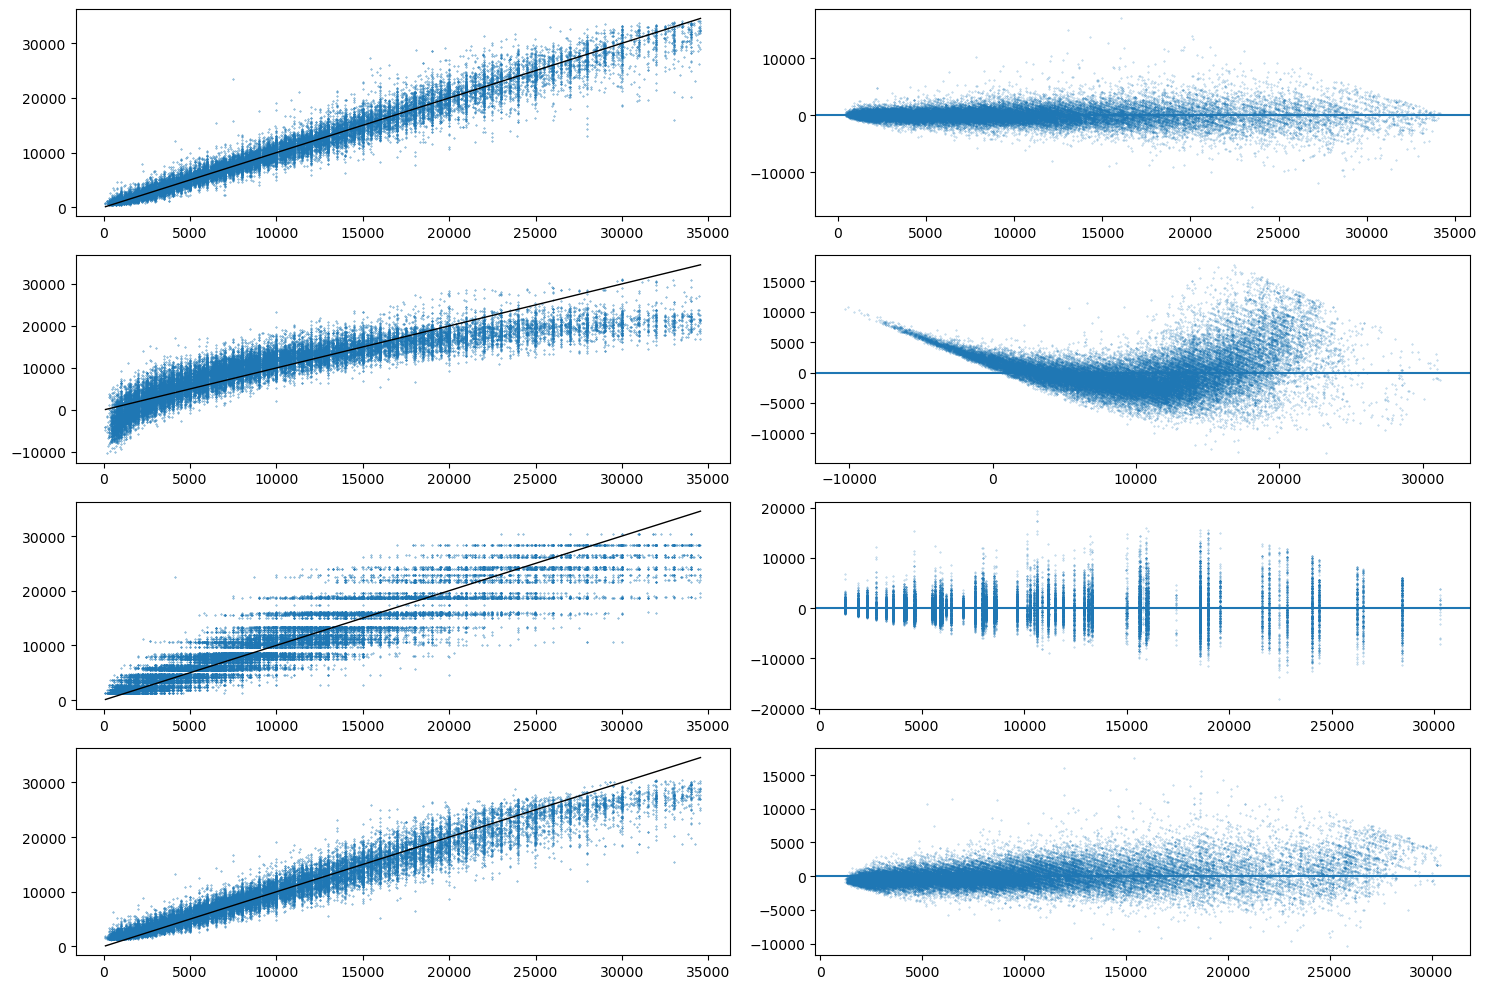

In [105]:
result_graphs(x_train_encoded, x_test_encoded, y_train, y_test, models)

In [83]:
# plt.scatter(y_test, y_pred, s=0.1)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=1)
# plt.show()

# residuals = y_test - y_pred

# plt.scatter(y_pred, residuals, alpha=0.5, s=0.1)
# plt.axhline(y=0)
# plt.show()

### Outliers

In [84]:
numeric_columns = [
    'adv_year',
    'adv_month',
    'reg_year',
    'run_miles',
    'engine_size',
    'price',
    'engine_power',
    'wheelbase',
    'height',
    'width',
    'length',
    'average_mpg',
    'top_speed',
    'seat_num',
    'door_num',
    'petrol',
    'diesel',
    'electric',
    'plug_in',
    'bi_fuel'
]

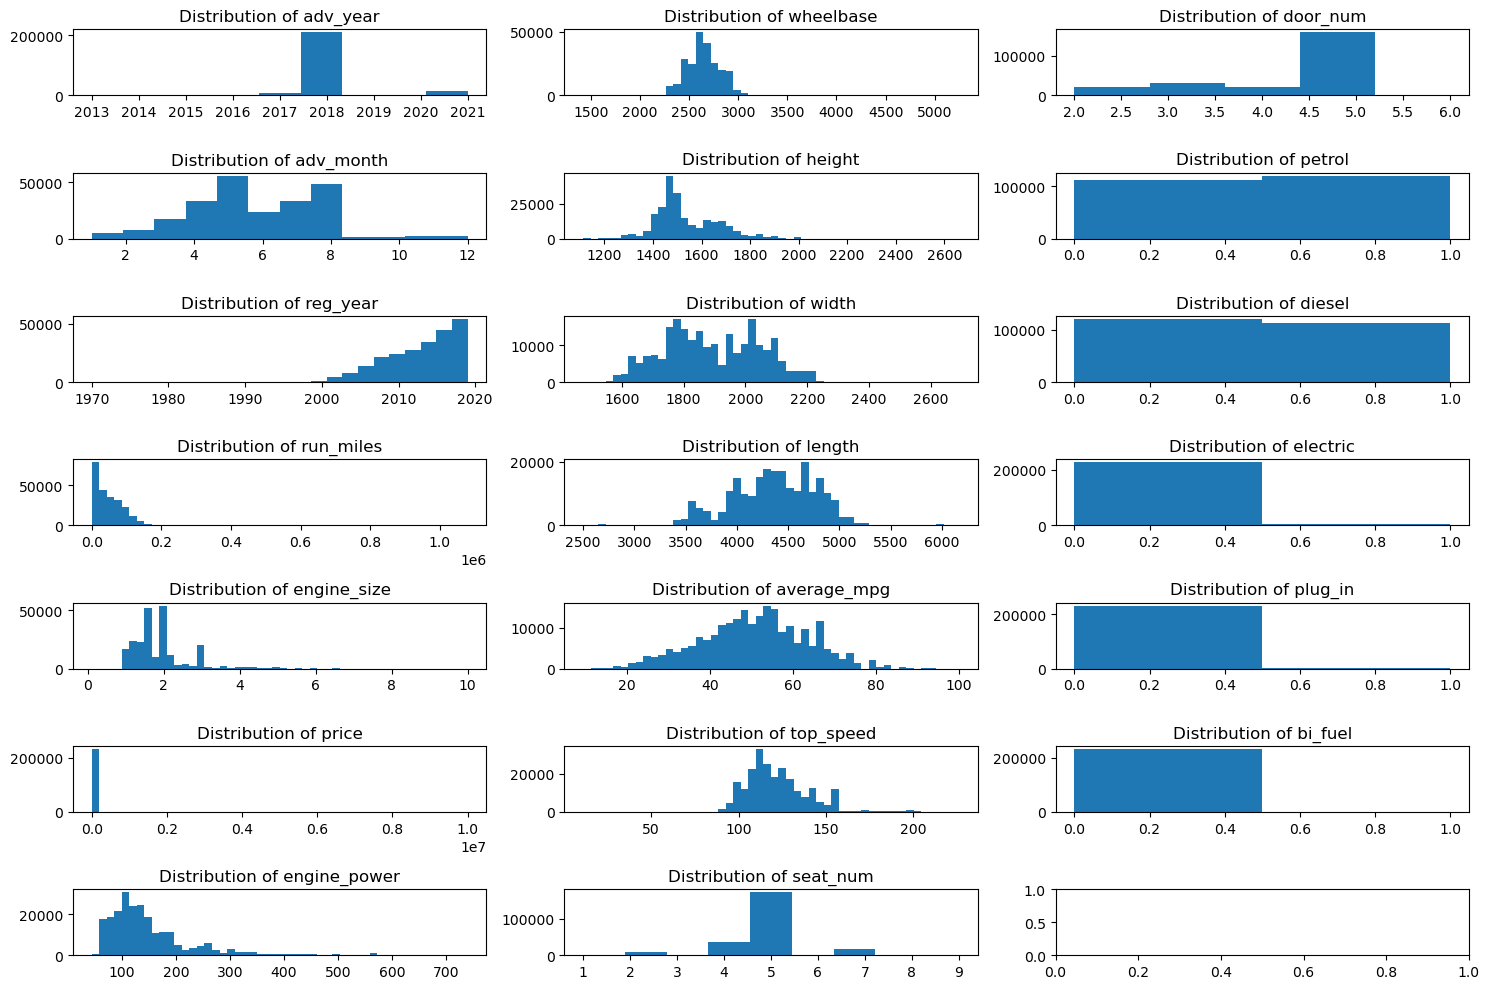

In [85]:
fig, axes = plt.subplots(7, 3, figsize=(15,10))

for i, col in enumerate(numeric_columns):
    row_num = i % 7
    col_num = i // 7

    ax = axes[row_num, col_num]

    ax.hist(cars[col], bins=min(cars[col].nunique(), 50))
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()    
plt.show()

In [86]:
outlier_columns = [
    'reg_year',
    'run_miles',
    'engine_size',
    'price',
    'engine_power',
    'wheelbase',
    'height',
    'width',
    'length',
    'average_mpg',
    'top_speed',
]

Q1 = cars[outlier_columns].quantile(0.25)
Q3 = cars[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outlier_mask = (cars[outlier_columns] < (Q1 - threshold * IQR)) | (cars[outlier_columns] > (Q3 + threshold * IQR))

cars_no_outliers = cars[~outlier_mask.any(axis=1)]

cars_no_outliers.shape

(191633, 26)

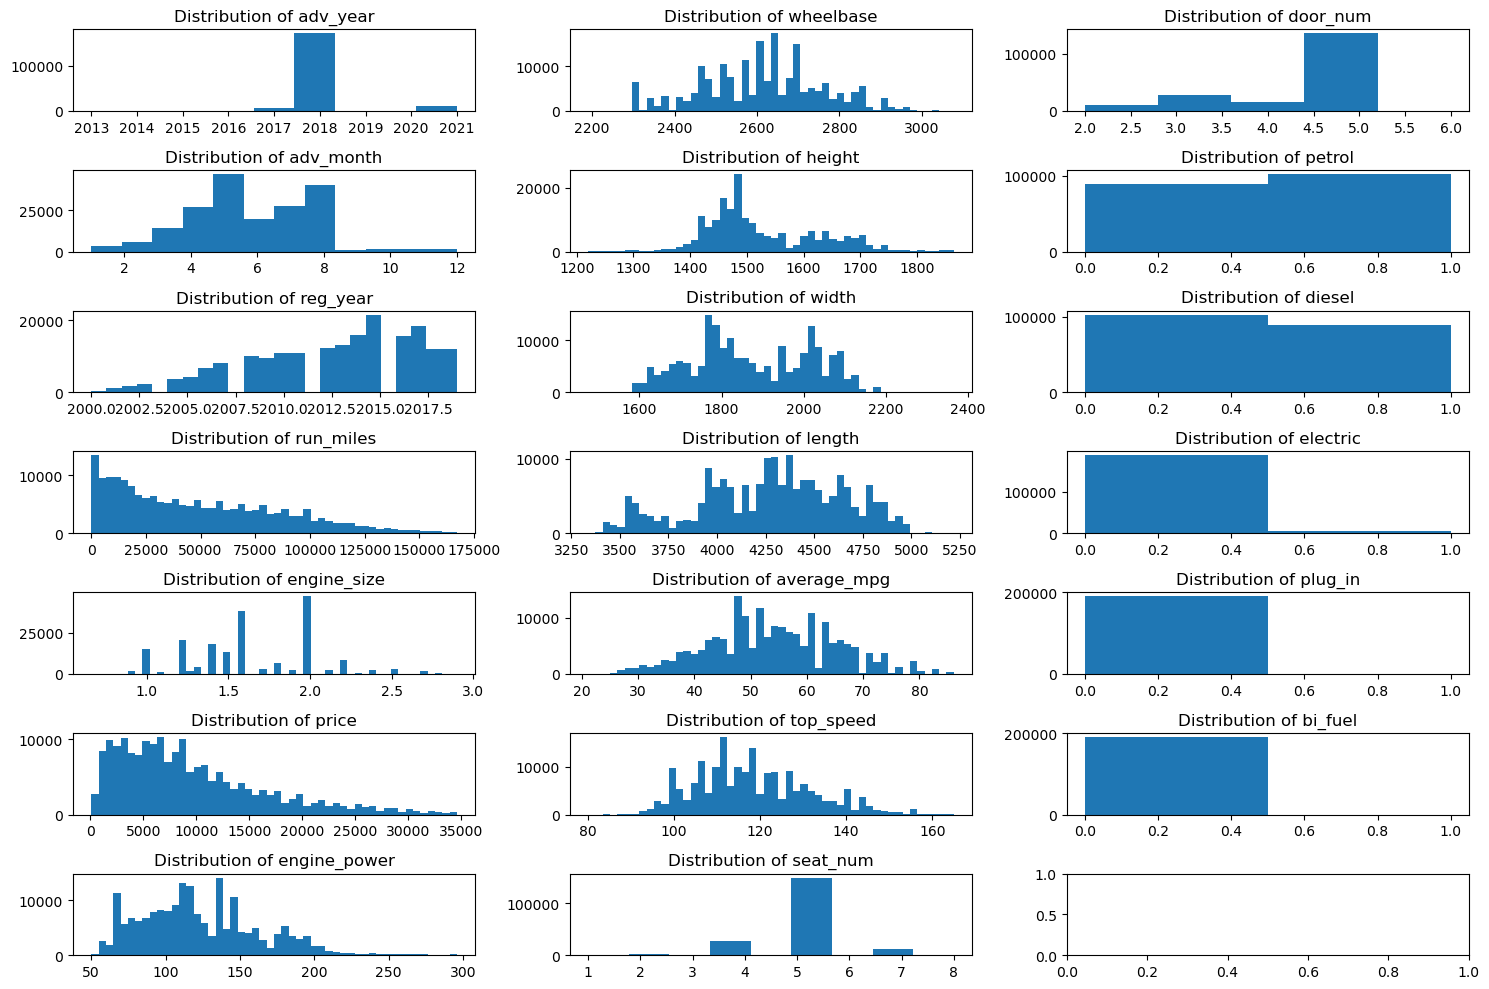

In [87]:
fig, axes = plt.subplots(7, 3, figsize=(15,10))

for i, col in enumerate(numeric_columns):
    row_num = i % 7
    col_num = i // 7

    ax = axes[row_num, col_num]

    ax.hist(cars_no_outliers[col], bins=min(cars[col].nunique(), 50))
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()    
plt.show()

### test 2

In [88]:
x, y = x_y_split(cars_no_outliers)
x_train, x_test, y_train, y_test = t_t_split(x, y)
x_train_encoded, x_test_encoded = encode(x_train, x_test, ['maker', 'genmodel'], ['color', 'body_type', 'gearbox'])

compare_performance(x_train_encoded, x_test_encoded, y_train, y_test, models)

/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,model,train_score,test_score,test_mse,duration
0,KNeighborsRegressor,0.892621,0.827936,8.467810e+06,0:31
1,LinearRegression,0.842180,0.840662,7.841520e+06,0:01
2,DecisionTreeRegressor,0.878014,0.876866,6.059818e+06,0:01
3,RandomForestRegressor,0.941215,0.937947,3.053841e+06,0:10


/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


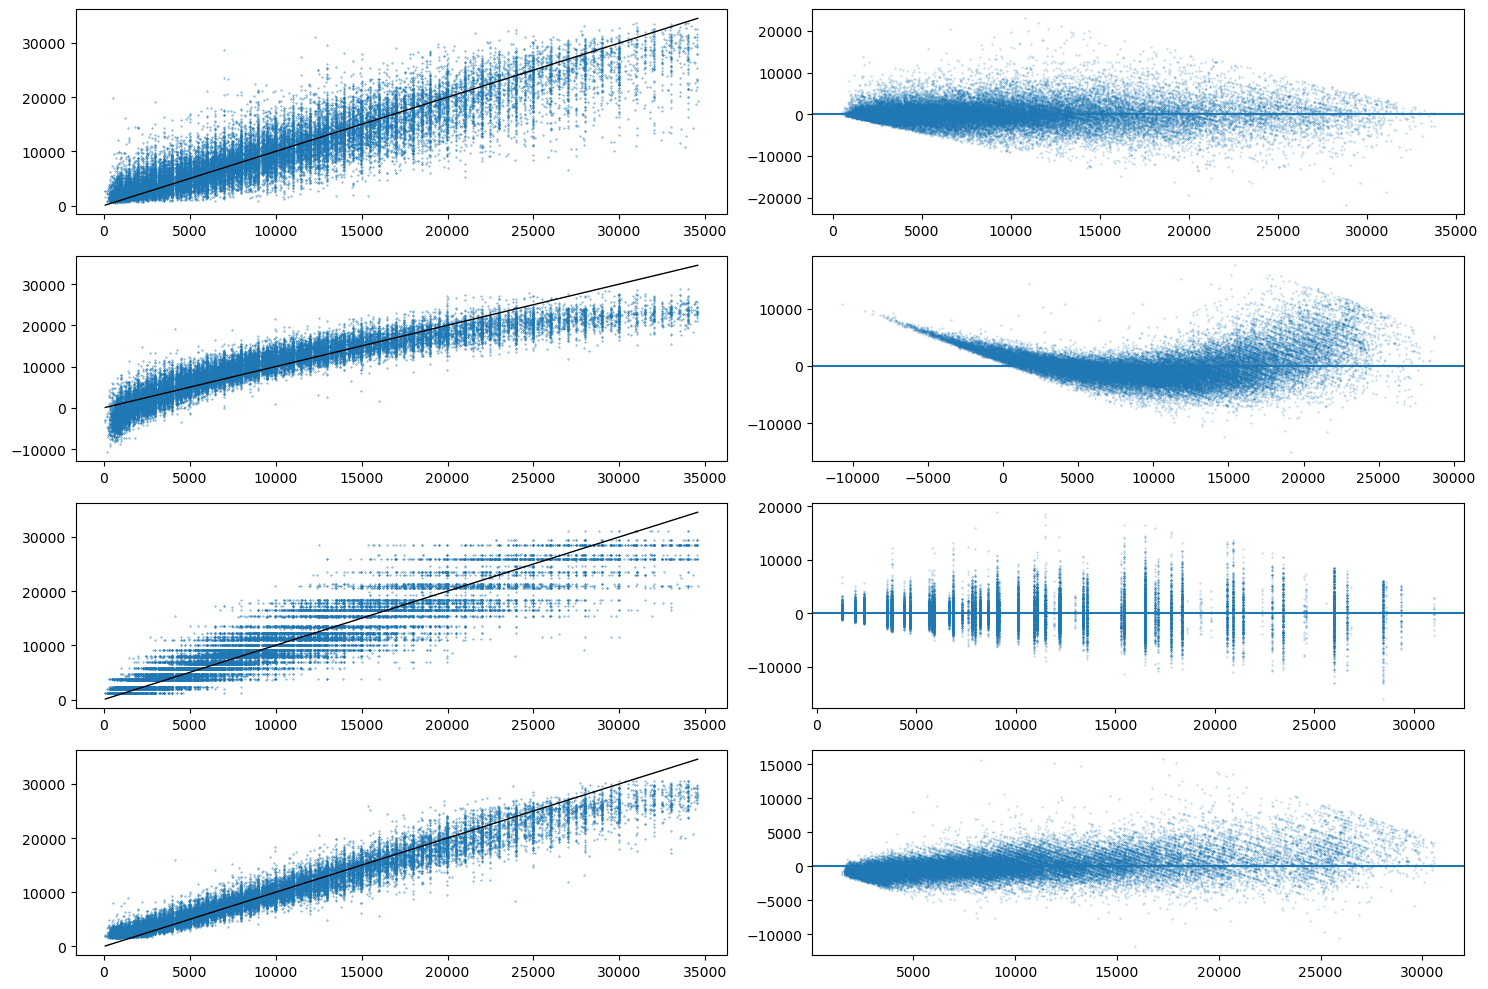

In [89]:
result_graphs(x_train_encoded, x_test_encoded, y_train, y_test, models)

### Standardize

In [90]:
cars[numeric_columns].var()

adv_year        5.697452e-01
adv_month       4.259806e+00
reg_year        2.008280e+01
run_miles       1.603711e+09
engine_size     6.157648e-01
price           8.961895e+08
engine_power    7.775501e+03
wheelbase       3.142844e+04
height          1.710491e+04
width           2.351586e+04
length          1.681674e+05
average_mpg     1.692869e+02
top_speed       3.528856e+02
seat_num        7.643344e-01
door_num        1.028762e+00
petrol          2.497309e-01
diesel          2.496736e-01
electric        2.365632e-02
plug_in         3.823913e-03
bi_fuel         9.885797e-05
dtype: float64

In [91]:
def standardize(x_train, x_test, cols):
    scaler = StandardScaler()

    x_train[cols] = scaler.fit_transform(x_train[cols])
    x_test[cols] = scaler.transform(x_test[cols])

    return (x_train, x_test)

### test 3

In [92]:
columns_to_standardize = [
    'run_miles',
    'engine_power',
    'wheelbase',
    'height',
    'width',
    'length',
]

x, y = x_y_split(cars_no_outliers)
x_train, x_test, y_train, y_test = t_t_split(x, y)
x_train_encoded, x_test_encoded = encode(x_train, x_test, ['maker', 'genmodel'], ['color', 'body_type', 'gearbox'])
x_train_standard, x_test_standard = standardize(x_train_encoded, x_test_encoded, columns_to_standardize) 

compare_performance(x_train_standard, x_test_standard, y_train, y_test, models)


/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,model,train_score,test_score,test_mse,duration
0,KNeighborsRegressor,0.972202,0.956286,2.151297e+06,0:30
1,LinearRegression,0.842180,0.840662,7.841520e+06,0:01
2,DecisionTreeRegressor,0.878014,0.876866,6.059818e+06,0:01
3,RandomForestRegressor,0.941216,0.937947,3.053853e+06,0:10


/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


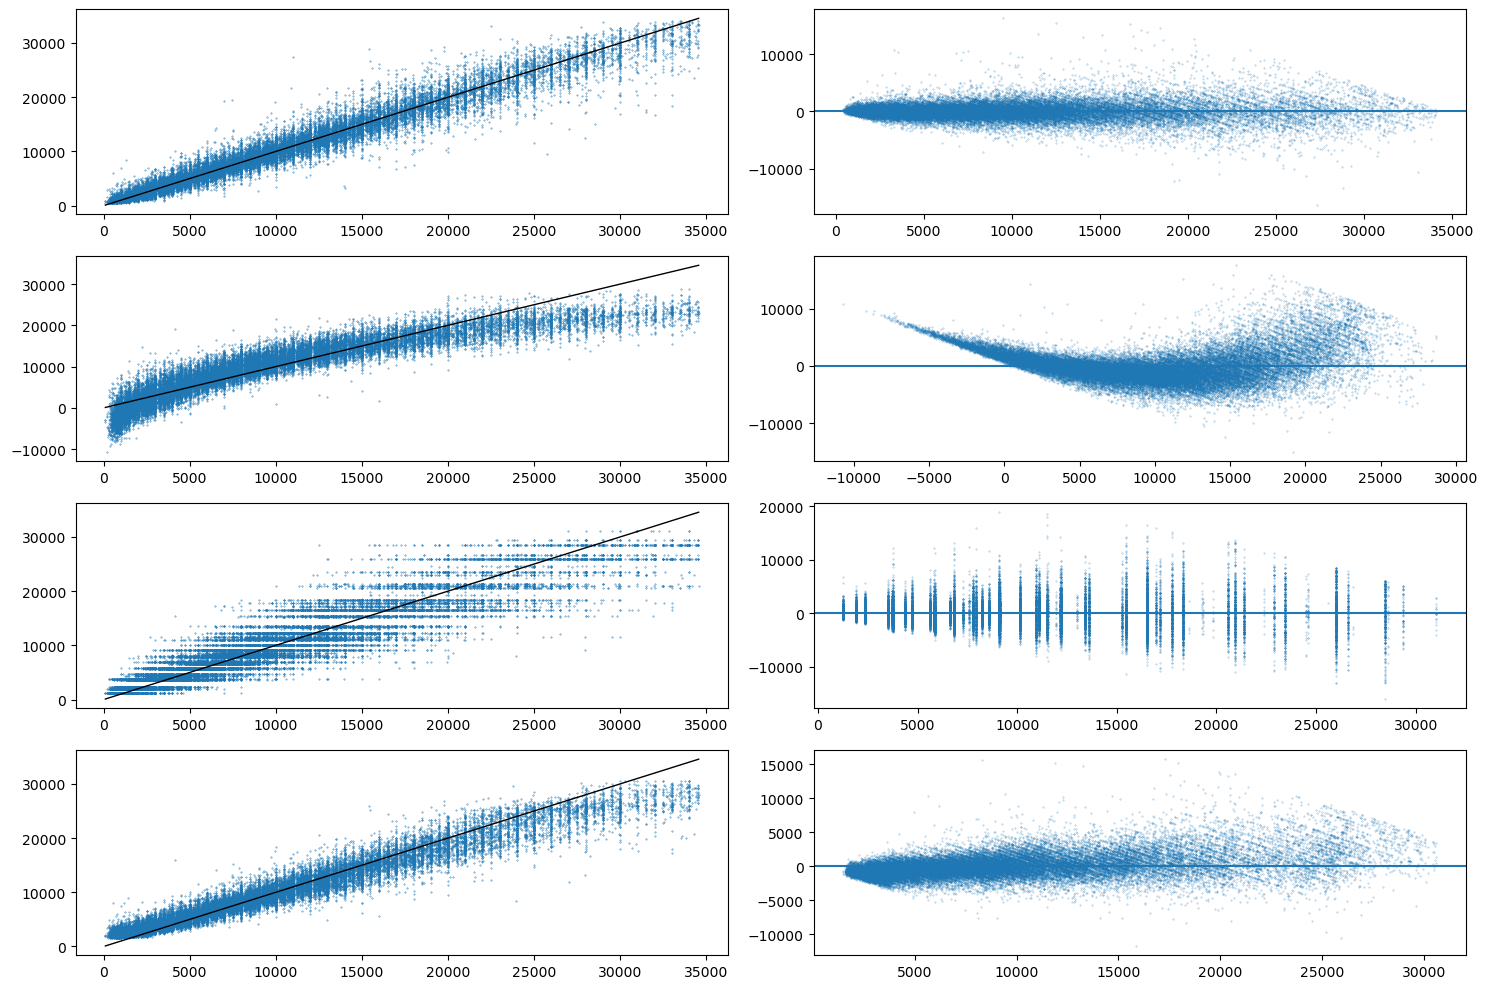

In [93]:
result_graphs(x_train_standard, x_test_standard, y_train, y_test, models)

### Correlation

In [94]:
cars_no_outliers[numeric_columns].corr(method='kendall')

,adv_year,adv_month,reg_year,run_miles,engine_size,price,engine_power,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num,petrol,diesel,electric,plug_in,bi_fuel
adv_year,1.000000,-0.197012,0.274400,-0.144879,-0.098276,0.155541,-0.005693,-0.019844,-0.007970,-0.004313,-0.033561,0.028350,-0.005663,0.016595,0.062593,0.121318,-0.121864,0.013871,0.033317,-0.002515
adv_month,-0.197012,1.000000,-0.054144,0.054461,-0.006278,-0.057216,-0.015105,-0.008840,-0.011087,0.000957,-0.003138,-0.016089,-0.007713,-0.001279,-0.016781,0.001941,-0.001301,-0.027236,-0.019334,0.005738
reg_year,0.274400,-0.054144,1.000000,-0.651786,-0.123940,0.659135,0.043310,0.067680,0.099661,0.178457,0.045793,0.344341,0.033346,0.075784,0.157493,-0.020677,0.018728,0.064682,0.048460,-0.000281
run_miles,-0.144879,0.054461,-0.651786,1.000000,0.191341,-0.521320,0.035044,0.043904,-0.077419,-0.100080,0.066226,-0.240333,0.048877,0.001509,-0.087520,-0.120663,0.122472,-0.050125,-0.034956,-0.001484
engine_size,-0.098276,-0.006278,-0.123940,0.191341,1.000000,0.157144,0.670257,0.505157,0.038386,0.252553,0.575216,-0.218583,0.547125,0.179631,-0.016165,-0.484382,0.483752,0.073777,0.032095,-0.003551
price,0.155541,-0.057216,0.659135,-0.521320,0.157144,1.000000,0.315285,0.250146,0.116272,0.263588,0.254796,0.197046,0.255841,0.114164,0.117371,-0.174759,0.172169,0.118785,0.065958,-0.002574
engine_power,-0.005693,-0.015105,0.043310,0.035044,0.670257,0.315285,1.000000,0.506278,0.015358,0.307820,0.562395,-0.211310,0.726217,0.141983,-0.034361,-0.313475,0.313639,0.022562,0.017922,-0.004283
wheelbase,-0.019844,-0.008840,0.067680,0.043904,0.505157,0.250146,0.506278,1.000000,0.125587,0.394519,0.777314,-0.043243,0.450414,0.404591,0.168248,-0.439158,0.438678,0.060274,0.038010,-0.001822
height,-0.007970,-0.011087,0.099661,-0.077419,0.038386,0.116272,0.015358,0.125587,1.000000,0.094865,0.119707,-0.053217,-0.190245,0.373622,0.428057,-0.158339,0.157908,-0.004721,0.015789,-0.002632
width,-0.004313,0.000957,0.178457,-0.100080,0.252553,0.263588,0.307820,0.394519,0.094865,1.000000,0.383644,0.013532,0.269350,0.186633,0.094408,-0.249870,0.250625,-0.038996,-0.002197,0.004707


In [95]:
columns_to_keep = [
    'price',
    'maker',
    'genmodel',
    'reg_year',
    'run_miles',
    'engine_power',
    'color',
    'body_type',
    'gearbox',
]

cars_features = cars_no_outliers[columns_to_keep]

### test 4

In [96]:
columns_to_standardize = [
    'run_miles',
    'engine_power',
]

x, y = x_y_split(cars_features)
x_train, x_test, y_train, y_test = t_t_split(x, y)
x_train_encoded, x_test_encoded = encode(x_train, x_test, ['maker', 'genmodel'], ['color', 'body_type', 'gearbox'])
x_train_standard, x_test_standard = standardize(x_train_encoded, x_test_encoded, columns_to_standardize)

compare_performance(x_train_standard, x_test_standard, y_train, y_test, models)

/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,model,train_score,test_score,test_mse,duration
0,KNeighborsRegressor,0.974995,0.960239,1.956766e+06,0:26
1,LinearRegression,0.825508,0.823645,8.679027e+06,0:00
2,DecisionTreeRegressor,0.875865,0.871731,6.312529e+06,0:00
3,RandomForestRegressor,0.914075,0.910312,4.413833e+06,0:06


/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


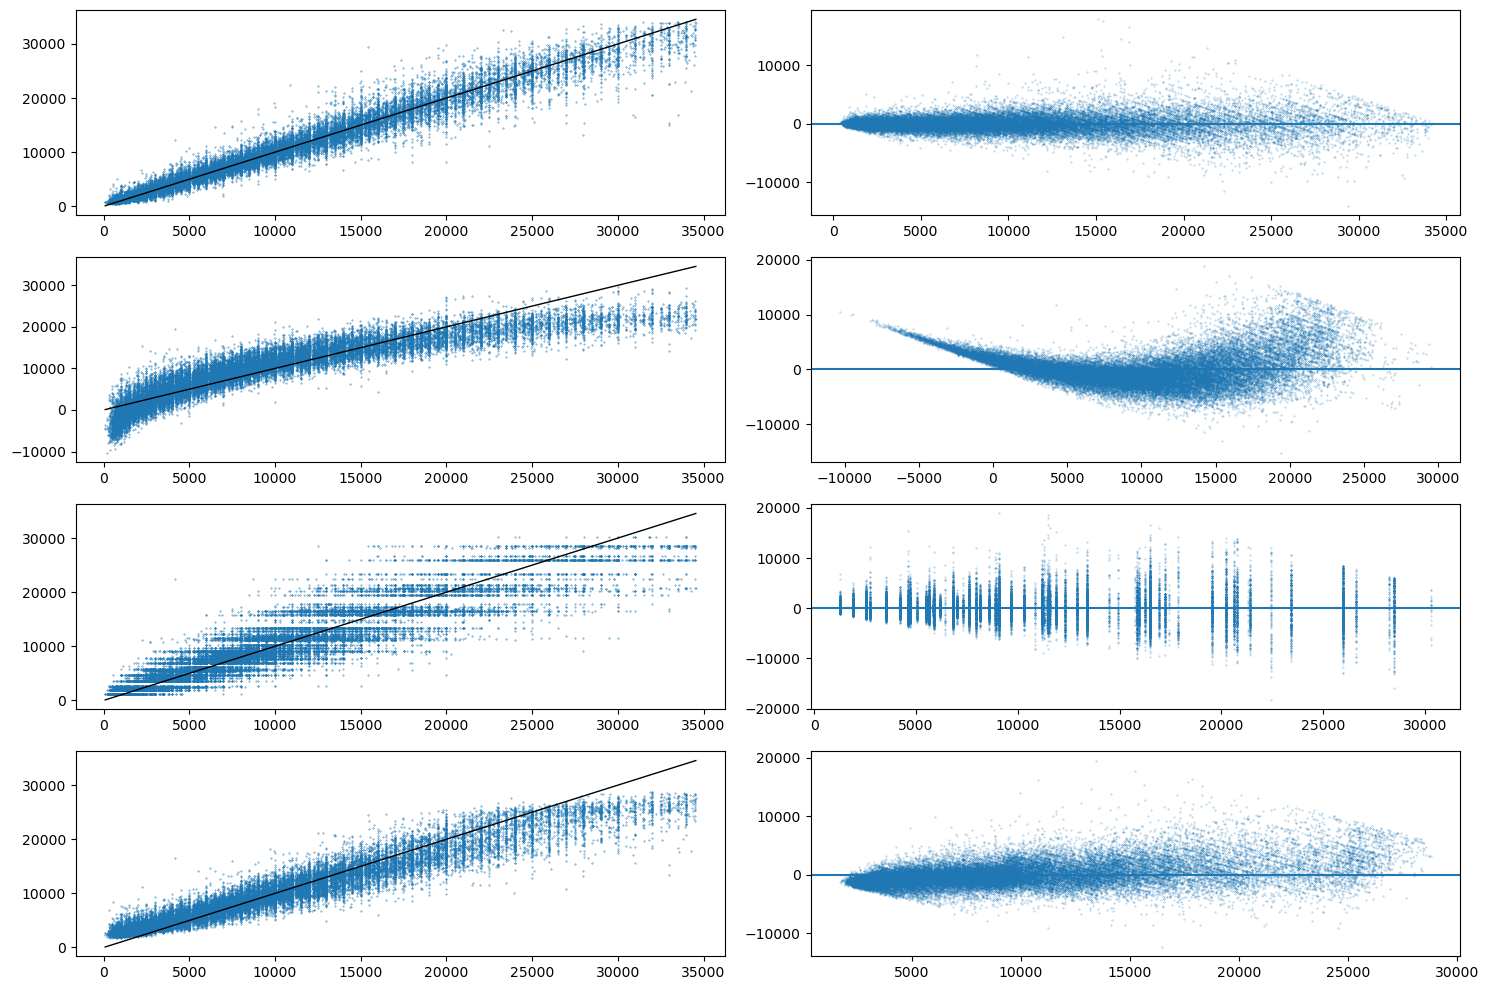

In [97]:
result_graphs(x_train_standard, x_test_standard, y_train, y_test, models)

### test 5

In [98]:
columns_to_keep_2 = [
    'price',
    'maker',
    'genmodel',
    'reg_year',
    'run_miles',
    'engine_power',
]

cars_features_2 = cars_no_outliers[columns_to_keep_2]

In [99]:
columns_to_standardize = [
    'run_miles',
    'engine_power',
]

x, y = x_y_split(cars_features_2)
x_train, x_test, y_train, y_test = t_t_split(x, y)
x_train_encoded, x_test_encoded = encode(x_train, x_test, ['maker', 'genmodel'], [])
x_train_standard, x_test_standard = standardize(x_train_encoded, x_test_encoded, columns_to_standardize)

compare_performance(x_train_standard, x_test_standard, y_train, y_test, models)

/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,model,train_score,test_score,test_mse,duration
0,KNeighborsRegressor,0.975490,0.962619,1.839645e+06,0:15
1,LinearRegression,0.787678,0.787135,1.047578e+07,0:00
2,DecisionTreeRegressor,0.867068,0.863764,6.704633e+06,0:00
3,RandomForestRegressor,0.943406,0.940352,2.935448e+06,0:07


/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


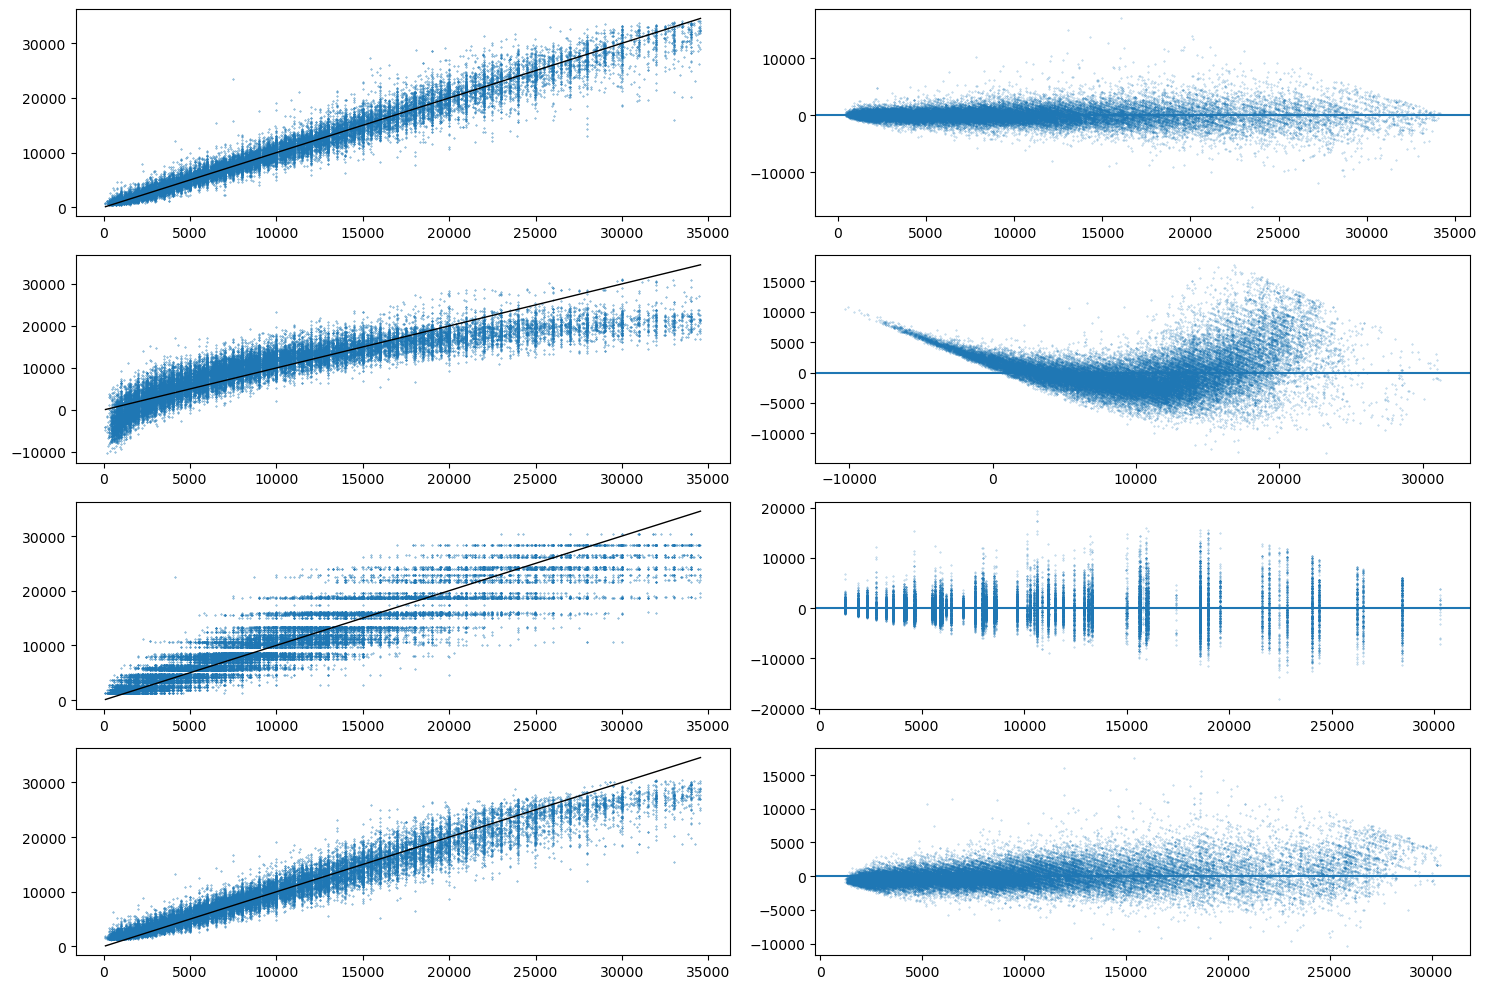

In [100]:
result_graphs(x_train_standard, x_test_standard, y_train, y_test, models)

In [101]:
feature_names = x_train_standard.columns.tolist()

model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
)

model_2 = LinearRegression()

model.fit(x_train_standard, y_train)
model_2.fit(x_train_standard, y_train)

importances = model.feature_importances_
importances_2 = model_2.coef_
print(importances_2)

pd.DataFrame({
    'feature_name': feature_names,
    'rf_importance': importances,
    'l_importance': importances_2[0]
})

/opt/miniconda3/envs/basic-da/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[-1131.31503649   704.41472375  1238.51969668   283.69176821
    219.1066859    353.95867312   573.33348202   157.04904521
   -342.41246482    73.12665599   321.82384199   489.94887759
    406.90032095   163.67555675  -122.89672467   775.44221062
  -2055.65120419  3232.93705487]]


,feature_name,rf_importance,l_importance
0,maker_0,0.002600,-1131.315036
1,maker_1,0.013591,704.414724
2,maker_2,0.014727,1238.519697
3,maker_3,0.013439,283.691768
4,maker_4,0.010503,219.106686
5,maker_5,0.008346,353.958673
6,genmodel_0,0.007568,573.333482
7,genmodel_1,0.007248,157.049045
8,genmodel_2,0.007788,-342.412465
9,genmodel_3,0.007064,73.126656
